In [3]:
import numpy as np
from PIL import Image
import os
import cv2

In [3]:
#In this part, I used 3 class for image classification.
#End of the notebook, I looked at whether the images are bad.
images = []

labels = []

for dirname, _,filenames in os.walk('raw_dataset'):
        
    for name in filenames:
            
        if name.lower().endswith(('.png')):
            image = cv2.imread(os.path.join(dirname, name))
            image_arr = Image.fromarray(image, 'RGB')          
            resized_im = image_arr.resize((32,32))
            images.append(np.array(resized_im))
            if 'Class1' in dirname:
                labels.append(1)
            elif 'Class1_def' in dirname:
                labels.append(1)
            elif 'Class2' in dirname:
                labels.append(2)
            elif 'Class2_def' in dirname:
                labels.append(2)
            elif 'Class3' in dirname:
                labels.append(3)
            elif 'Class3_def' in dirname:
                labels.append(3)
            else:
                labels.append(0) #it is only for controlling whether there other files are.



In [4]:
#The range for each colour is 0-255
#By dividing by 255, the 0-255 range can be described with a 0-1 range.

data_images = np.array(images)/255  
data_labels = np.array(labels)
print(data_images.shape)
print(data_labels.shape)

(3452, 32, 32, 3)
(3452,)


In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#before using a model for classification, I deal with categorical labels and 
#I divide data as train and test splits.

train_images, test_images, train_labels, test_labels = train_test_split(data_images, data_labels, test_size = 0.2, random_state = 10)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [7]:
print(train_images.shape,test_images.shape,train_labels.shape,test_labels.shape)


(2761, 32, 32, 3) (691, 32, 32, 3) (2761, 4) (691, 4)


<h1><center> <br>CNN (Convolutional Neural Network)<br>

I used Convolutional neural network for image classification. It is very useful for image data and in general, it gives good output for this purpose. 
I tried it for different types such as Sequential, Xception and Resnet50. I used accuracy scores to determine whether the model is good for image classification. We can use softmax, sigmoid and relu functions as activation functions. I used relu and softmax.

**Sequential**

In [8]:
from tensorflow.keras import layers 
from tensorflow.keras import models

In [9]:
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.ZeroPadding2D(input_shape = (32,32,3), padding=(3,3)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.BatchNormalization(axis = 3))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 38, 38, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 36, 36, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 36, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 6

In [11]:
tf.keras.backend.clear_session()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels), batch_size=10)

Epoch 1/10
277/277 [==============================] - 4s 13ms/step - loss: 0.0556 - accuracy: 0.9859 - val_loss: 0.1153 - val_accuracy: 1.0000
Epoch 2/10
277/277 [==============================] - 4s 14ms/step - loss: 5.7223e-04 - accuracy: 1.0000 - val_loss: 0.7639 - val_accuracy: 0.6961
Epoch 3/10
277/277 [==============================] - 4s 16ms/step - loss: 0.1236 - accuracy: 0.9794 - val_loss: 0.1998 - val_accuracy: 0.9146
Epoch 4/10
277/277 [==============================] - 5s 17ms/step - loss: 0.0207 - accuracy: 0.9946 - val_loss: 0.0202 - val_accuracy: 0.9928
Epoch 5/10
277/277 [==============================] - 5s 17ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 8.6229e-05 - val_accuracy: 1.0000
Epoch 6/10
277/277 [==============================] - 6s 21ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/10
277/277 [==============================] - 5s 19ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.0068 - val_accuracy

22/22 - 0s - loss: 2.5892e-05 - accuracy: 1.0000


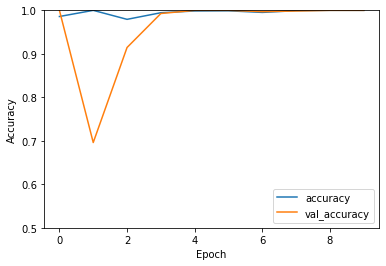

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

**Xception**

Since Xception CNN model is required to at least 71x71 image, I resized the images. I realized it after the Sequential model worked. Also, I wanted to get different solution.

In [14]:
images_2 = []

labels_2 = []

for dirname, _,filenames in os.walk('raw_dataset'):
        
    for name in filenames:
            
        if name.lower().endswith(('.png')) or name.lower().endswith(('.jpg')) :
                
            image = cv2.imread(os.path.join(dirname, name))
            image_arr = Image.fromarray(image, 'RGB')          
            resized_im = image_arr.resize((72,72))
            images_2.append(np.array(resized_im))
            if 'Class1' in dirname:
                labels_2.append(1)
            elif 'Class1_def' in dirname:
                labels_2.append(1)
            elif 'Class2' in dirname:
                labels_2.append(2)
            elif 'Class2_def' in dirname:
                labels_2.append(2)
            elif 'Class3' in dirname:
                labels_2.append(3)
            elif 'Class3_def' in dirname:
                labels_2.append(3)
            else:
                labels_2.append(0)



In [15]:
data_images_xcept = np.array(images_2)/255
data_labels_xcept = np.array(labels_2)
data_images_xcept.shape


(3452, 72, 72, 3)

In [16]:
data_labels_xcept = np.reshape(data_labels_xcept,(3452,1))
data_labels_xcept.shape

(3452, 1)

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images_xcept, test_images_xcept, train_labels_xcept, test_labels_xcept = train_test_split(data_images_xcept, data_labels_xcept, test_size = 0.2, random_state = 10)
train_labels_xcept = to_categorical(train_labels_xcept)
test_labels_xcept = to_categorical(test_labels_xcept)

In [18]:
tf.keras.backend.clear_session()
model_xcept = tf.keras.applications.Xception(input_shape =(72,72,3), weights= None, pooling = 'max',classes=4,classifier_activation='softmax')

In [19]:
model_xcept.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [20]:
tf.keras.backend.clear_session()
model_xcept.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_xcept = model_xcept.fit(train_images_xcept, train_labels_xcept, epochs=10,validation_data=(test_images_xcept, test_labels_xcept), batch_size=10)

Epoch 1/10
277/277 [==============================] - 278s 1s/step - loss: 0.1980 - accuracy: 0.9638 - val_loss: 1.2581 - val_accuracy: 0.3560
Epoch 2/10
277/277 [==============================] - 293s 1s/step - loss: 0.0423 - accuracy: 0.9895 - val_loss: 5.1027 - val_accuracy: 0.5962
Epoch 3/10
277/277 [==============================] - 288s 1s/step - loss: 0.1531 - accuracy: 0.9739 - val_loss: 8.3567e-05 - val_accuracy: 1.0000
Epoch 4/10
277/277 [==============================] - 260s 938ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0395 - val_accuracy: 0.9928
Epoch 5/10
277/277 [==============================] - 274s 990ms/step - loss: 0.0122 - accuracy: 0.9975 - val_loss: 6.2707e-05 - val_accuracy: 1.0000
Epoch 6/10
277/277 [==============================] - 258s 932ms/step - loss: 0.0287 - accuracy: 0.9967 - val_loss: 6.2438e-05 - val_accuracy: 1.0000
Epoch 7/10
277/277 [==============================] - 266s 959ms/step - loss: 0.0819 - accuracy: 0.9895 - val_loss: 0.005

22/22 - 6s - loss: 0.7773 - accuracy: 0.8003


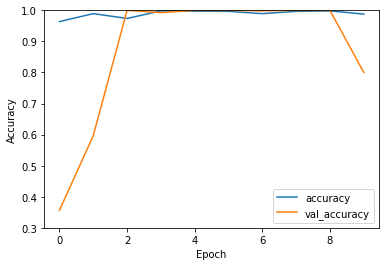

In [27]:
plt.plot(history_xcept.history['accuracy'], label='accuracy')
plt.plot(history_xcept.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss_xcept, test_acc_xcept = model_xcept.evaluate(test_images_xcept, test_labels_xcept, verbose=2)

**ResNet50**

In [28]:
tf.keras.backend.clear_session()
model_ResNet50 = tf.keras.applications.ResNet50(input_shape = (72,72,3), weights= None, pooling = 'max',classes = 4,classifier_activation='softmax')

In [29]:
model_ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 78, 78, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 36, 36, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 36, 36, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [32]:
tf.keras.backend.clear_session()
model_ResNet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_ResNet50 = model_ResNet50.fit(train_images_xcept, train_labels_xcept, epochs=10,validation_data=(test_images_xcept, test_labels_xcept), batch_size=10)

Epoch 1/10
277/277 [==============================] - 265s 957ms/step - loss: 0.3814 - accuracy: 0.9511 - val_loss: 10.5892 - val_accuracy: 0.3560
Epoch 2/10
277/277 [==============================] - 256s 924ms/step - loss: 0.1436 - accuracy: 0.9750 - val_loss: 4.4233 - val_accuracy: 0.3632
Epoch 3/10
277/277 [==============================] - 241s 872ms/step - loss: 0.1357 - accuracy: 0.9823 - val_loss: 0.0882 - val_accuracy: 0.9609
Epoch 4/10
277/277 [==============================] - 242s 873ms/step - loss: 0.0374 - accuracy: 0.9928 - val_loss: 0.0502 - val_accuracy: 0.9942
Epoch 5/10
277/277 [==============================] - 241s 868ms/step - loss: 0.0410 - accuracy: 0.9873 - val_loss: 9.6119 - val_accuracy: 0.3748
Epoch 6/10
277/277 [==============================] - 236s 852ms/step - loss: 0.0383 - accuracy: 0.9899 - val_loss: 11.1523 - val_accuracy: 0.3198
Epoch 7/10
277/277 [==============================] - 251s 908ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 27.559

22/22 - 9s - loss: 7.7816e-04 - accuracy: 1.0000


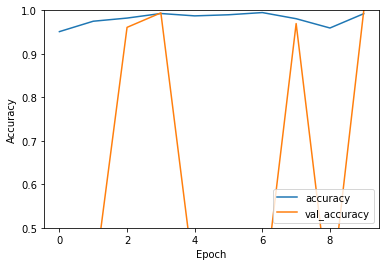

In [33]:
plt.plot(history_ResNet50.history['accuracy'], label='accuracy')
plt.plot(history_ResNet50.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_ResNet50, test_acc_ResNet50 = model_ResNet50.evaluate(test_images_xcept, test_labels_xcept, verbose=2)

**To understand whether the images are defected**, I constructed 6 classed. 2,4,and 6 shows defected images and 1,3,5 shows good images.

In [34]:

images_3 = []

labels_3 = []

for dirname, _,filenames in os.walk('raw_dataset'):
        
    for name in filenames:
            
        if name.lower().endswith(('.png')):
            image = cv2.imread(os.path.join(dirname, name))
            image_arr = Image.fromarray(image, 'RGB')          
            resized_im = image_arr.resize((72,72))
            images_3.append(np.array(resized_im))
            if 'Class1' in dirname:
                labels_3.append(1)
            elif 'Class1_def' in dirname:
                labels_3.append(2)
            elif 'Class2' in dirname:
                labels_3.append(3)
            elif 'Class2_def' in dirname:
                labels_3.append(4)
            elif 'Class3' in dirname:
                labels_3.append(5)
            elif 'Class3_def' in dirname:
                labels_3.append(6)
            else:
                labels_3.append(0)




In [35]:

data_images_3 = np.array(images_3)/255  
data_labels_3 = np.array(labels_3)
print(data_images_3.shape)
print(data_labels_3.shape)

(3452, 72, 72, 3)
(3452,)


In [36]:
train_images_3, test_images_3, train_labels_3, test_labels_3 = train_test_split(data_images_3, data_labels_3, test_size = 0.2, random_state = 10)
train_labels_3 = to_categorical(train_labels_3)
test_labels_3 = to_categorical(test_labels_3)

In [37]:
#applying similar process for this data.
#some parts change; for example dense since there are 6 classes here.
#SequentiL Model
tf.keras.backend.clear_session()
model_3 = models.Sequential()
model_3.add(layers.ZeroPadding2D(input_shape = (72,72,3), padding=(3,3)))
model_3.add(layers.Conv2D(72, (3, 3), activation = 'relu'))
model_3.add(layers.BatchNormalization(axis = 3))
model_3.add(layers.MaxPool2D(2,2))
model_3.add(layers.Conv2D(144, (3, 3), activation='relu'))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(6))
model_3.add(layers.Activation('softmax')) 

In [38]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 78, 78, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 76, 76, 72)        2016      
_________________________________________________________________
batch_normalization (BatchNo (None, 76, 76, 72)        288       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 72)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 144)       93456     
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1

In [40]:
tf.keras.backend.clear_session()
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3 = model_3.fit(train_images_3, train_labels_3, epochs=10, validation_data=(test_images_3, test_labels_3), batch_size=10)

Epoch 1/10
277/277 [==============================] - 27s 96ms/step - loss: 0.3391 - accuracy: 0.9775 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
277/277 [==============================] - 36s 128ms/step - loss: 0.1065 - accuracy: 0.9938 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
277/277 [==============================] - 39s 141ms/step - loss: 0.0154 - accuracy: 0.9975 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
277/277 [==============================] - 40s 145ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
277/277 [==============================] - 43s 157ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
277/277 [==============================] - 44s 159ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
277/277 [==============================] - 44s 159ms/step - loss: 0.0000e+00 - accur

22/22 - 2s - loss: 0.0000e+00 - accuracy: 1.0000


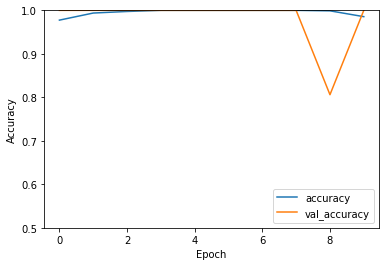

In [42]:
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

test_loss_3, test_acc_3 = model_3.evaluate(test_images_3,  test_labels_3, verbose=2)

In [43]:
#Xception model
tf.keras.backend.clear_session()
model_3xcept = tf.keras.applications.Xception(input_shape = (72,72,3), weights = None, pooling = 'max',classes = 6,classifier_activation='softmax')

In [44]:
model_3xcept.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [45]:
tf.keras.backend.clear_session()
model_3xcept.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3xcept = model_3xcept.fit(train_images_3, train_labels_3, epochs=10, validation_data=(test_images_3, test_labels_3), batch_size=10)

Epoch 1/10
277/277 [==============================] - 249s 898ms/step - loss: 0.1255 - accuracy: 0.9768 - val_loss: 1.4154 - val_accuracy: 0.3560
Epoch 2/10
277/277 [==============================] - 247s 891ms/step - loss: 0.0186 - accuracy: 0.9960 - val_loss: 4.6647 - val_accuracy: 0.3560
Epoch 3/10
277/277 [==============================] - 260s 939ms/step - loss: 0.1682 - accuracy: 0.9667 - val_loss: 0.0253 - val_accuracy: 0.9957
Epoch 4/10
277/277 [==============================] - 252s 911ms/step - loss: 0.0800 - accuracy: 0.9848 - val_loss: 1.1314e-05 - val_accuracy: 1.0000
Epoch 5/10
277/277 [==============================] - 263s 949ms/step - loss: 0.0327 - accuracy: 0.9884 - val_loss: 2.1976e-05 - val_accuracy: 1.0000
Epoch 6/10
277/277 [==============================] - 259s 935ms/step - loss: 0.0213 - accuracy: 0.9960 - val_loss: 4.3299e-06 - val_accuracy: 1.0000
Epoch 7/10
277/277 [==============================] - 269s 970ms/step - loss: 0.0532 - accuracy: 0.9938 - val_lo

22/22 - 7s - loss: 5.6940e-06 - accuracy: 1.0000


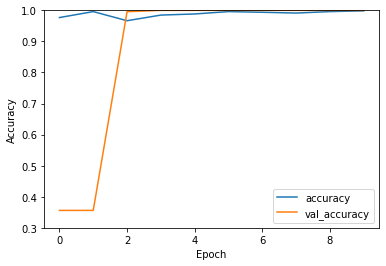

In [50]:
plt.plot(history_3xcept.history['accuracy'], label='accuracy')
plt.plot(history_3xcept.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.legend(loc='lower right')

test_loss_3xcept, test_acc_3xcept = model_3xcept.evaluate(test_images_3,  test_labels_3, verbose=2)

In [47]:
#Resnet50
tf.keras.backend.clear_session()
model_3ResNet50 = tf.keras.applications.ResNet50(input_shape = (72,72,3), weights= None, pooling = 'max',classes=6,classifier_activation='softmax')

In [51]:
model_3ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 78, 78, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 36, 36, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 36, 36, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [52]:
tf.keras.backend.clear_session()
model_3ResNet50.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3ResNet50 = model_3ResNet50.fit(train_images_3, train_labels_3, epochs=10, validation_data=(test_images_3, test_labels_3), batch_size=10)

Epoch 1/10
277/277 [==============================] - 250s 903ms/step - loss: 0.2907 - accuracy: 0.9478 - val_loss: 11.5546 - val_accuracy: 0.3560
Epoch 2/10
277/277 [==============================] - 255s 919ms/step - loss: 0.1304 - accuracy: 0.9790 - val_loss: 12.8641 - val_accuracy: 0.4139
Epoch 3/10
277/277 [==============================] - 259s 935ms/step - loss: 0.0723 - accuracy: 0.9870 - val_loss: 0.1151 - val_accuracy: 0.9667
Epoch 4/10
277/277 [==============================] - 250s 901ms/step - loss: 0.0706 - accuracy: 0.9841 - val_loss: 2.4086 - val_accuracy: 0.6671
Epoch 5/10
277/277 [==============================] - 259s 936ms/step - loss: 0.0848 - accuracy: 0.9844 - val_loss: 30.4911 - val_accuracy: 0.3198
Epoch 6/10
277/277 [==============================] - 255s 921ms/step - loss: 0.0312 - accuracy: 0.9946 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/10
277/277 [==============================] - 245s 885ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.021

22/22 - 7s - loss: 0.0216 - accuracy: 0.9942


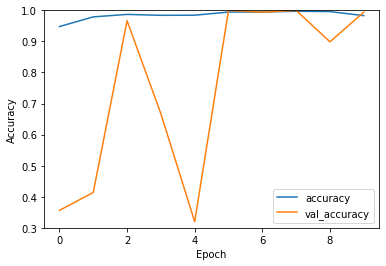

In [54]:
plt.plot(history_3ResNet50.history['accuracy'], label='accuracy')
plt.plot(history_3ResNet50.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss_3ResNet50, test_acc_3ResNet50 = model_3ResNet50.evaluate(test_images_3, test_labels_3, verbose=2)

**Why I use CNN for image classification?**

CNN is very useful for image classification and it gives high accuracy scores for this purpose. Therefore, I tried to CNN models using different hidden layers like Xception, Sequential and ResNet50.  We may also use logistic regression for this dataset and it may give good result. 

**Mark defected areas in defected images**

In [4]:

#for defected images

class1_def_images = []


for dirname, _,filenames in os.walk('Class1_def'):
        
    for name in filenames:
            
        if name.lower().endswith(('.png')):
            image = cv2.imread(os.path.join(dirname, name))
            image_arr = Image.fromarray(image, 'RGB')          
            resized_im = image_arr.resize((512,512))
            class1_def_images.append(np.array(resized_im))

class2_def_images = []


for dirname, _,filenames in os.walk('Class1_def'):
        
    for name in filenames:
            
        if name.lower().endswith(('.png')):
            image = cv2.imread(os.path.join(dirname, name))
            image_arr = Image.fromarray(image, 'RGB')          
            resized_im = image_arr.resize((512,512))
            class2_def_images.append(np.array(resized_im))
            
class3_def_images = []


for dirname, _,filenames in os.walk('Class1_def'):
        
    for name in filenames:
            
        if name.lower().endswith(('.png')):
            image = cv2.imread(os.path.join(dirname, name))
            image_arr = Image.fromarray(image, 'RGB')          
            resized_im = image_arr.resize((512,512))
            class3_def_images.append(np.array(resized_im))

In [5]:
labels1 = np.loadtxt('labels1_def.txt')

labels2 = np.loadtxt('labels2_def.txt')

labels3 = np.loadtxt('labels3_def.txt')

In [6]:
def_images = np.vstack((class1_def_images, class2_def_images, class3_def_images))
def_images = def_images/255
def_labels = np.vstack((labels1, labels2, labels3))

In [7]:
def_images.shape

(450, 512, 512, 3)

In [8]:
def_labels.shape

(450, 6)

In [9]:
def_labels[0]

array([ 1.  , 60.24, 37.55,  0.65, 69.04, 87.6 ])

Labels consists of 5 values:
Column-1: [semi-major axis],
Column-2: [semi-minor axis],
Column-3: [rotation angle],
Column-4: [x-position of the centre of the ellipsoid],
Column-5: [y-position of the centre of the ellipsoid].

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

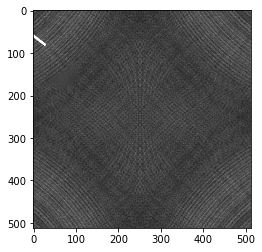

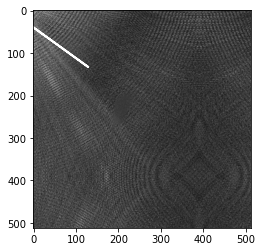

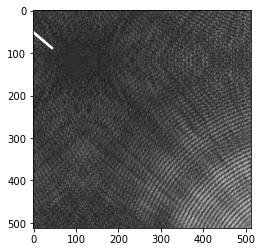

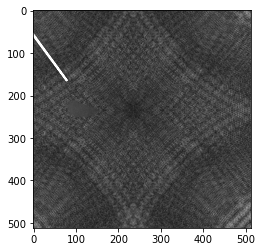

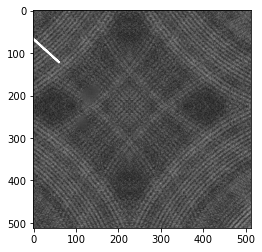

In [11]:
#demo to show defected part of selected images
for i in range(0,5):
    img = def_images[i,:,:]
    fig, ax = plt.subplots()
    ax.imshow(img)
    ellipse = Ellipse((def_labels[i,0],def_labels[i,1]), width=def_labels[i,4], 
                      height=def_labels[i,3], angle=def_labels[i,2], 
                      edgecolor='white',linewidth=2)

    ax.add_patch(ellipse)
    path = ellipse.get_path()
    plt.show()